In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()

In [14]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('train_transaction.csv')
df.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.shape

(590540, 394)

In [16]:
df = df.sample(frac=1)
is_Fraud1 = df.loc[df['isFraud'] == 1]
is_Fraud0 = df.loc[df['isFraud'] == 0]

In [17]:
normal_distributed_df = pd.concat([is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                    is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                   is_Fraud0])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
159220,3146220,0,3349640,225.000,R,10486,514.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73771,3060771,1,1631842,33.814,C,1085,500.0,185.0,mastercard,219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586279,3573279,0,15695731,319.990,W,17499,NaN,150.0,mastercard,197.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257900,3244900,0,6193982,47.950,W,3277,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52289,3039289,0,1219694,87.000,W,14634,365.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(776507, 394)

<AxesSubplot:>

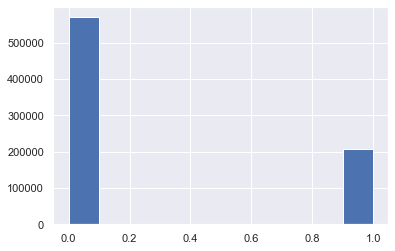

In [19]:
df.isFraud.hist()

In [20]:
feature_list = ['isFraud', 'card4', 'card6', 'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'addr2']
target = 'isFraud'
# Categorical features
cat = ['ProductCD', 'P_emaildomain','R_emaildomain', 'card4', 'card6', 'addr2']
# Numeric features
num = ['TransactionAmt']


In [21]:
df["P_emaildomain"].fillna("None", inplace = True)
df["R_emaildomain"].fillna("None", inplace = True)

In [22]:
temp = df[feature_list]
temp

,isFraud,card4,card6,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,addr2
159220,0,mastercard,credit,225.000,R,comcast.net,gmail.com,87.0
73771,1,mastercard,credit,33.814,C,gmail.com,gmail.com,NaN
586279,0,mastercard,debit,319.990,W,yahoo.com,None,87.0
257900,0,visa,debit,47.950,W,gmail.com,None,87.0
52289,0,visa,debit,87.000,W,gmail.com,None,87.0
...,...,...,...,...,...,...,...,...
145579,0,visa,debit,159.950,W,aol.com,None,87.0
86597,0,visa,debit,111.120,C,hotmail.com,hotmail.com,NaN
524538,1,visa,debit,445.000,W,yahoo.com,None,87.0
264789,0,visa,debit,226.000,W,None,None,87.0


In [23]:
temp = temp.dropna()
temp

,isFraud,card4,card6,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,addr2
159220,0,mastercard,credit,225.00,R,comcast.net,gmail.com,87.0
586279,0,mastercard,debit,319.99,W,yahoo.com,None,87.0
257900,0,visa,debit,47.95,W,gmail.com,None,87.0
52289,0,visa,debit,87.00,W,gmail.com,None,87.0
189562,0,mastercard,credit,209.95,W,gmail.com,None,87.0
...,...,...,...,...,...,...,...,...
295338,1,visa,credit,100.00,H,gmail.com,gmail.com,87.0
522399,0,american express,credit,150.00,H,anonymous.com,anonymous.com,87.0
145579,0,visa,debit,159.95,W,aol.com,None,87.0
524538,1,visa,debit,445.00,W,yahoo.com,None,87.0


In [24]:
features = temp[cat]
features = pd.get_dummies(features)
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain_None,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,...,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit
159220,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
586279,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
257900,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
52289,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
189562,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295338,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
522399,87.0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
145579,87.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
524538,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
features['TransactionAmt'] = temp['TransactionAmt']
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain_None,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,...,R_emaildomain_ymail.com,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,TransactionAmt
159220,87.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,225.00
586279,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,319.99
257900,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,47.95
52289,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,87.00
189562,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,209.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295338,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,100.00
522399,87.0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,150.00
145579,87.0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,159.95
524538,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,445.00


In [26]:
features['isFraud'] = temp['isFraud']
features

,addr2,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,P_emaildomain_None,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,...,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,TransactionAmt,isFraud
159220,87.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,225.00,0
586279,87.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,319.99,0
257900,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,47.95,0
52289,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,87.00,0
189562,87.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,209.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295338,87.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,100.00,1
522399,87.0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,150.00,0
145579,87.0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,159.95,0
524538,87.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,445.00,1


In [28]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['isFraud'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isFraud', axis = 1)

# Saving feature names for later use
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [29]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [30]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (479648, 136)
Training Labels Shape: (479648,)
Testing Features Shape: (159883, 136)
Testing Labels Shape: (159883,)


In [31]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(train_features, train_labels)

# Predict the Test set results

label_pred = rfc.predict(test_features)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(test_labels, label_pred)))

Model accuracy score with 100 decision-trees : 0.8680


In [32]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    127640
           1       0.76      0.50      0.60     32243

    accuracy                           0.87    159883
   macro avg       0.82      0.73      0.76    159883
weighted avg       0.86      0.87      0.86    159883



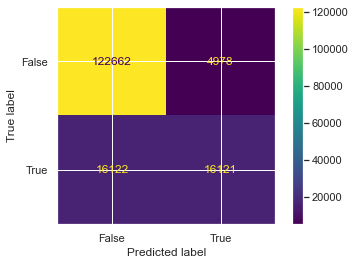

In [33]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_labels, label_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()